# Hiện thực các hàm tính toán phục vụ cho biến đổi DFT

In [1]:
import numpy as np
import cv2
import gdown
import matplotlib.pyplot as plt


In [2]:
def get_matrix_W_DFT(size):
    E = np.array(range(0, size))
    E = np.matmul(E.reshape(size, 1), E.reshape(1, size)) % size
    W = np.full((size, size), np.exp(complex('-j') * 2 * np.pi/size))
    W = W ** E
    return W

In [3]:
def DFT_1D(f_arr: np.array, W = None):
    size = f_arr.shape[0]
    if W is None:
        W = get_matrix_W_DFT(size)
    F_arr = np.matmul(W, f_arr)
    return F_arr


In [4]:
def IDFT_1D(F_arr: np.array, W = None):
   size = F_arr.shape[0]
   if W is None:
      W = np.linalg.inv(get_matrix_W_DFT(size))
   f_arr = np.matmul(W, F_arr)
   return f_arr

In [5]:
def DFT_2D(image: np.array):
    W = get_matrix_W_DFT(image.shape[0])
    w_DFT_1D = lambda arr: DFT_1D(arr, W)
    new_image = np.apply_along_axis(w_DFT_1D, 1, image)
    new_image = np.apply_along_axis(w_DFT_1D, 0, new_image)
    return new_image
    


In [6]:
def IDFT_2D(matrix: np.array):
    W = np.linalg.inv(get_matrix_W_DFT(matrix.shape[0]))
    w_IDFT_1D = lambda arr: IDFT_1D(arr, W)
    new_matrix = np.apply_along_axis(w_IDFT_1D, 1, matrix)
    new_matrix = np.apply_along_axis(w_IDFT_1D, 0, new_matrix)
    return new_matrix

In [250]:
def shift(image: np.array):
    m = image.shape[0] // 2
    n = image.shape[1] // 2
    return np.vstack((np.hstack((image[m:, n:], image[m:, :n])), np.hstack((image[:m, n:], image[:m, :n]))))       

In [8]:
def pad(image: np.array, size = 256):
    width = image.shape[1]
    height = image.shape[0]
    i_h = i_w = 0
    if (width - size) % 2 == 1: i_w += 1
    if (size - height) % 2 == 1: i_h += 1
    padding_image = np.pad(image, pad_width=((-(height-size)//2, -(height-size)//2 + i_h), (-(width-size)//2, -(width-size)//2 + i_w)))
    return padding_image



### Download ảnh 

Downloading...
From: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTU62Md2yC4lIg8Mt_ZUGEVBaoXR7apfYbWbQ&usqp=CAU
To: c:\Users\Lenovo\Downloads\img.png
100%|██████████| 6.24k/6.24k [00:00<?, ?B/s]


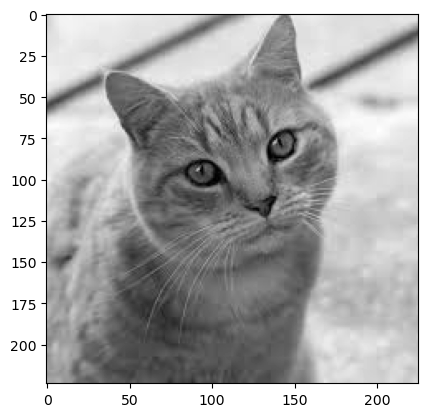

In [189]:
gdown.download('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTU62Md2yC4lIg8Mt_ZUGEVBaoXR7apfYbWbQ&usqp=CAU', output = "img.png")
img_path = "img.png"
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.show()



In [10]:
img.shape

(224, 225)

### Padding ảnh, chọn kích thước sau khi padding là 256 = $2^8$

In [11]:
padding_img = pad(img, 256)
img.shape

(224, 225)

### Đối chiếu kết quả của hàm IDFT_2D tự hiện thực với np.fft.ifft2 

In [12]:
IDFT_2D(padding_img)

array([[ 1.18229630e+02+5.40133704e-13j, -3.55037686e-01-8.86661041e+00j,
        -1.99016203e+01+4.83637937e-02j, ...,
        -2.09589332e+01-5.40982776e+00j, -1.99016203e+01-4.83637937e-02j,
        -3.55037686e-01+8.86661041e+00j],
       [-1.32206901e+01+1.07611283e+01j, -7.53631132e+00-1.43808058e+00j,
         2.67895208e+00-4.42473755e-01j, ...,
         4.56611962e+00-1.94478965e+00j,  3.40397753e+00-7.35271521e-01j,
         1.38362498e+00-2.73453637e+00j],
       [-1.44708552e+01+5.87462069e+00j, -2.04357268e+00-2.02981459e+00j,
         8.42958099e-01+1.23058782e+00j, ...,
         2.64818792e+00+3.11525185e+00j,  3.25638279e-01+7.17567670e-02j,
         4.90967884e+00-6.58571840e+00j],
       ...,
       [-1.44795144e+01-2.65883390e+00j,  3.50877235e+00+1.91348500e-01j,
         4.78093398e+00+5.70735971e-01j, ...,
         1.47758262e+00+1.91647134e+00j,  1.25567338e-01+1.06359644e+00j,
        -1.13740562e-01-5.72490161e-01j],
       [-1.44708552e+01-5.87462069e+00j,  4.

In [13]:
np.fft.ifft2(padding_img)

array([[ 1.18229630e+02 +0.j        , -3.55037686e-01 -8.86661041j,
        -1.99016203e+01 +0.04836379j, ..., -2.09589332e+01 -5.40982776j,
        -1.99016203e+01 -0.04836379j, -3.55037686e-01 +8.86661041j],
       [-1.32206901e+01+10.76112829j, -7.53631132e+00 -1.43808058j,
         2.67895208e+00 -0.44247375j, ...,  4.56611962e+00 -1.94478965j,
         3.40397753e+00 -0.73527152j,  1.38362498e+00 -2.73453637j],
       [-1.44708552e+01 +5.87462069j, -2.04357268e+00 -2.02981459j,
         8.42958099e-01 +1.23058782j, ...,  2.64818792e+00 +3.11525185j,
         3.25638279e-01 +0.07175677j,  4.90967884e+00 -6.5857184j ],
       ...,
       [-1.44795144e+01 -2.6588339j ,  3.50877235e+00 +0.1913485j ,
         4.78093398e+00 +0.57073597j, ...,  1.47758262e+00 +1.91647134j,
         1.25567338e-01 +1.06359644j, -1.13740562e-01 -0.57249016j],
       [-1.44708552e+01 -5.87462069j,  4.90967884e+00 +6.5857184j ,
         3.25638279e-01 -0.07175677j, ...,  2.13092321e+00 +2.05712095j,
       

### Thử nghiệm DFT_2D và IDFT_2D cho ảnh

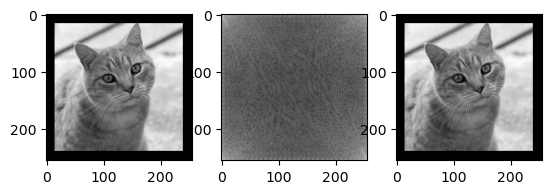

In [204]:
plt.subplot(1, 3, 1)
plt.imshow(padding_img, cmap='gray')

dft_image = DFT_2D(padding_img)
plt.subplot(1, 3, 2)
plt.imshow(np.log(np.abs(dft_image)), cmap='gray')

check_img = np.real(IDFT_2D(dft_image))
plt.subplot(1, 3, 3)
plt.imshow(check_img, cmap='gray')
plt.show()

### Tạo box_kernel và thực hiện padding

In [14]:
SIZE_KERNEL = 9
box_kernel = np.array([[1]*SIZE_KERNEL] * SIZE_KERNEL) / (SIZE_KERNEL * SIZE_KERNEL)
padding_kernel = pad(box_kernel, 256)

## Thực hiện phép biến đổi Convolution nhờ các hàm tính toán DFT vừa hiện thực

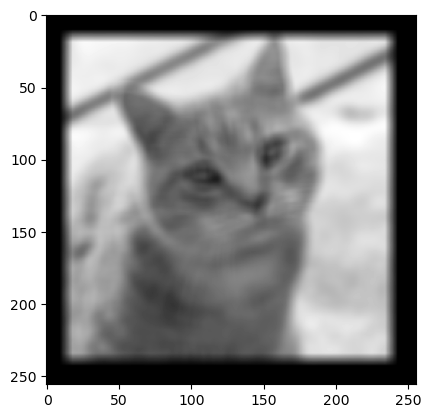

In [205]:
dft_image = (DFT_2D(shift(padding_img)))
dft_kernel =  (DFT_2D(shift(padding_kernel)))
my_img  = shift(IDFT_2D((dft_image * dft_kernel)))
my_img = np.real(my_img)
plt.imshow(my_img, cmap='gray')

## Đối chiếu với scipy.signal.convolve2d 

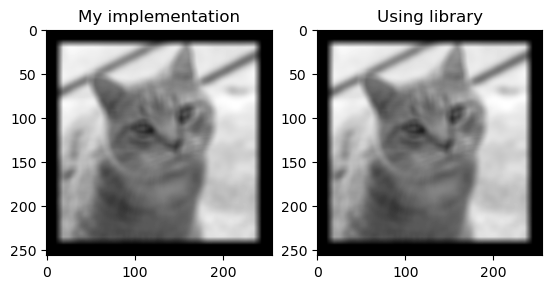

In [206]:
plt.subplot(1,2,1)
plt.imshow(my_img, cmap='gray')
plt.title("My implementation")

import scipy
scipy_image = scipy.signal.convolve2d(padding_img, box_kernel, mode = "same")
plt.imshow(scipy_image, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(scipy_image, cmap='gray')
plt.title("Using library")
plt.show()

# Khảo sát một số bộ lọc miền tần số

In [22]:
ideal_low_pass = lambda u, v, r: 1 if u**2 + v**2 <= r**2 else 0
butterworth_low_pass = lambda u, v, r, n: 1 / (1 + (u**2 + v**2) / r**2)**n
gaussian_low_pass = lambda u, v, r: np.exp(-(u**2 + v**2) / (2 * r**2))
ideal_high_pass = lambda u, v, r: 0 if u**2 + v**2 <= r**2 else 1
butterworth_high_pass = lambda u, v, r, n: 1 / (1 + r**2 / (u**2 + v**2))**n
gaussian_high_pass = lambda u, v, r: 1 - np.exp(-(u**2 + v**2) / (2 * r**2))
laplacian = lambda u, v: -4 * np.pi**2 * (u**2 + v**2)
band_reject = lambda u, v, r1, r2: 1 if r1**2 <= u**2 + v**2 <= r2**2 else 0
band_pass = lambda u, v, r1, r2: 0 if r1**2 <= u**2 + v**2 <= r2**2 else 1


In [28]:
def create_fre_filter(image_size, lambda_func, *para):
    fre_filter = np.zeros((image_size, image_size))
    for i in range(image_size):
        for j in range(image_size):
            fre_filter[i, j] = lambda_func(i - image_size//2, j - image_size//2, *para)
    return fre_filter
     

### Hiển thị cửa sổ một số filter

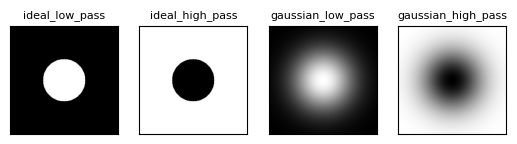

In [74]:
radius = 50
for (i, x) in enumerate(['ideal_low_pass', 'ideal_high_pass', 'gaussian_low_pass', 'gaussian_high_pass']):
    filter = None
    exec(f"filter = create_fre_filter(256, {x}, {radius})")
    plt.subplot(1, 4, i + 1)
    plt.imshow(filter, cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.title(x, fontsize=8)
plt.show()


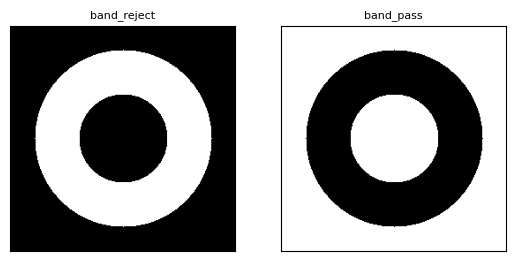

In [75]:
in_radius, out_radius = 50, 100
for (i, x) in enumerate(['band_reject', 'band_pass']):
    filter = None
    exec(f"filter = create_fre_filter(256, {x}, {in_radius}, {out_radius})")
    plt.subplot(1, 2, i + 1)
    plt.imshow(filter, cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.title(x, fontsize=8)
plt.show()

### Hiển thị surface view cho bộ lọc butterworth low pass

In [103]:
import matplotlib.cm as cm
def view_3d_filter(func, *para):
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    filter = create_fre_filter(256, func, *para)
    X = np.arange(0, 256, 1)
    Y = np.arange(0, 256, 1)
    X, Y = np.meshgrid(X, Y)
    Z = filter
    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                          linewidth=0, antialiased=False)

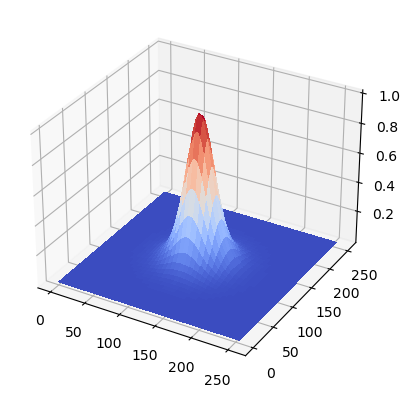

In [107]:
radius = 50
n = 4
view_3d_filter(butterworth_low_pass, radius, n)


### Thử nghiệm bộ lọc Low Pass Filter cho ảnh (chỉ sử dụng các hàm tự hiện thực)

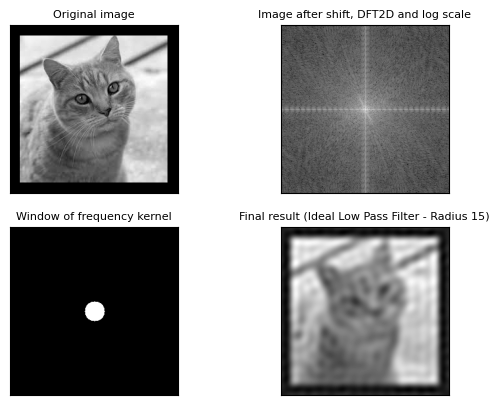

In [264]:
plt.subplot(2,2,1)
plt.imshow(padding_img, cmap='gray')
plt.title("Original image", fontsize=8)
plt.xticks([])
plt.yticks([])
plt.subplot(2,2,2)

dft_img = shift(DFT_2D((padding_img)))
plt.title("Image after shift, DFT2D and log scale", fontsize=8)
plt.xticks([])
plt.yticks([])
plt.imshow(np.log(1 + np.abs(dft_img)), cmap='gray')

filter = create_fre_filter(256, ideal_low_pass, 15)
plt.subplot(2, 2, 3)
plt.imshow(filter, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title("Window of frequency kernel", fontsize=8)

final_result = np.real(IDFT_2D(shift(dft_img * filter)))
plt.subplot(2, 2, 4)
plt.imshow(final_result, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title("Final result (Ideal Low Pass Filter - Radius 15)", fontsize=8)
plt.show()
